<a href="https://colab.research.google.com/github/Rojan116/Deeplearning_computervision/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
train_data = np.genfromtxt("./sample_data/mnist_train_small.csv",delimiter=',')
test_data = np.genfromtxt("./sample_data/mnist_test.csv",delimiter=',')
print(train_data.shape)
print(test_data.shape)


(20000, 785)
(10000, 785)


(785,)
0.0
(28, 28)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 128. 253. 104.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  92. 231.  98.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.  16.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.  

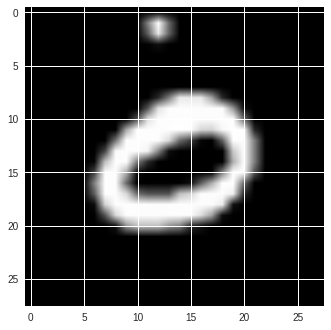

In [6]:
import random
from matplotlib import pyplot as plt

index = random.randint(0,20000)


single_image_data = train_data[index]

print(single_image_data.shape)

label = single_image_data[0]
image = single_image_data[1:785]
image = image.reshape(28,28)
print(label)
print(image.shape)
print(image)

plt.imshow(image,cmap = 'gray', interpolation='bilinear')

In [7]:

train_images = train_data[:, 1:785]
train_images = train_images.reshape(-1,28,28,1)

train_labels = train_data[:, 0:1]

test_images = test_data[:, 1:785]
test_images = test_images.reshape(-1,28,28,1)
test_labels = test_data[:, 0:1]



print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(20000, 28, 28, 1)
(20000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [8]:

train_images = train_data[:, 1:785]
train_images = train_images.reshape(-1,28,28,1)

train_labels = train_data[:, 0:1]

test_images = test_data[:, 1:785]
test_images = test_images.reshape(-1,28,28,1)
test_labels = test_data[:, 0:1]



print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(20000, 28, 28, 1)
(20000, 1)
(10000, 28, 28, 1)
(10000, 1)


In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=10, kernel_size= [3,3], activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2,2]),
    tf.keras.layers.Conv2D(filters=5, kernel_size=[3,3], activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(pool_size=[2,2]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(
    #optimizer= tf.keras.optimizers.RMSprop(lr=0.1, decay=1e-4),
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    shuffle=True
)

Epoch 1/10
20000/20000 [==============================] - 7s 344us/sample - loss: 0.6707 - acc: 0.7903
Epoch 2/10
20000/20000 [==============================] - 4s 191us/sample - loss: 0.2240 - acc: 0.9324
Epoch 3/10
20000/20000 [==============================] - 4s 191us/sample - loss: 0.1567 - acc: 0.9503
Epoch 4/10
20000/20000 [==============================] - 4s 185us/sample - loss: 0.1250 - acc: 0.9621
Epoch 5/10
20000/20000 [==============================] - 4s 206us/sample - loss: 0.1078 - acc: 0.9657
Epoch 6/10
20000/20000 [==============================] - 4s 217us/sample - loss: 0.0925 - acc: 0.9706
Epoch 7/10
20000/20000 [==============================] - 4s 210us/sample - loss: 0.0825 - acc: 0.9749
Epoch 8/10
20000/20000 [==============================] - 4s 208us/sample - loss: 0.0757 - acc: 0.9764
Epoch 9/10
20000/20000 [==============================] - 4s 209us/sample - loss: 0.0732 - acc: 0.9762
Epoch 10/10
20000/20000 [==============================] - 4s 207us/sampl

In [11]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.0743 - acc: 0.9759


[0.07434080771543086, 0.9759]

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_v1 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 5)         455       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 5)           0         
_________________________________________________________________
flatten (Flatten)            (None, 125)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1260      
Total para

In [13]:
model.evaluate(test_images,test_labels)


10000/10000 [==============================] - 1s 80us/sample - loss: 0.0743 - acc: 0.9759


[0.07434080771543086, 0.9759]

In [14]:

import os
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']

model.summary()

tpu_model = tf.contrib.tpu.keras_to_tpu_model(model,strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])))
    
tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=1e-3, ),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['sparse_categorical_accuracy']
)

KeyError: ignored

In [0]:
tpu_model.fit(
    train_images,
    train_labels,
    epochs=2,
    batch_size=32,
    shuffle=False
)

In [0]:
model.save('./cnn.h5')


In [0]:
from google.colab import files
files.download('./cnn.h5') 
